# Visualizing Geospatial Data

This notebook is a modified version of M. Janosov's original, as presented in *[Geospatial Data Science Essentials](https://www.janosov.com/books/geo/)*

We may call geospatial data science the quantitative science of maps. As such, data visualization is a major pillar for understanding spatial information. Nowadays, there are a number of powerful techniques that transform raw spatial data into intuitive, interactive, and informative visual representations. In the sections that follow, we will explore the most widely used of these tools in Python.

1. First, we will learn how to use Matplotlib for both categorical and continuous data coloring and how to enhance our visualizations with context using base maps from Contextily.
2. Then, we will make a detour to create interactive maps with Folium and Plotly.
3. We will also cover advanced visualization techniques, such as generating heatmaps, overlaying multiple GeoDataFrames, and visualizing 3D geometries with Matplotlib and Pydeck.

These examples will build the essential skills needed to create detailed, engaging, and insightful geospatial visualizations that can be applied to a wide range of data analysis tasks.

### 1. Using Matplotlib for Categorical Coloring in Geospatial Data

Visualizing geospatial data with **categorical values** can provide clear and insightful representations of records of different kinds stored in GeoDataFrames. One effective way to achieve this is by using [Matplotlib](https://matplotlib.org/stable/index.html) with categorical coloring. 

In the following example, we will rely on the built-in world map dataset of `GeoPandas`, and we will use `Matplotlib` to visualize a world map where each country is colored according to its continent stored in the categorical data column `continent`. First, we create a figure and axis using `plt.subplots` to ensure flexibility with the plot. In this example, we pick the figure size to be (10, 4), which measures the size of the canvas in the horizontal and vertical dimensions in inches.

Then, we introduced several further parameters for the `plot` function:

- `alpha` parameter controls the transparency (with a value of 0.9, signaling 10% opacity),
- `cmap` specifies the colormap (where I used the built-in `tab10` colormap).
-  Additional formatting includes
   -  customizing the style of the boundary lines and
   -  adding a custom legend box to the plot.

**NOTE**

All plots can be saved to an image directory using the following commands:

```python
imgfolder = './figures'
os.listdir(imgfolder)
# Plot the GeoDataFrame with categorical coloring by continent
gdf.plot(
    ax=ax,
    column='continent',  # Column to determine colors
    alpha=0.9,  # Transparency level
    cmap='tab10',  # Colormap
    edgecolor='w',  # Color of the edges
    linewidth=1,  # Width of the edges
    legend=True  # Display legend
)
plt.savefig(imgfolder + '/section31.png', dpi = 300, facecolor = 'white', bbox_inches = 'tight')

```

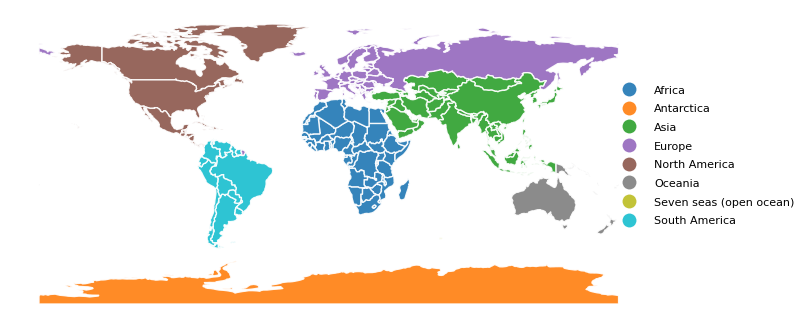

In [2]:
# Import the relevant packages
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the sample dataset of world countries
file_name = 'naturalearth_lowres/naturalearth_lowres.shp'
gdf = gpd.read_file(file_name)

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot the GeoDataFrame with categorical coloring by continent
gdf.plot(
    ax=ax,
    column='continent',  # Column to determine colors
    alpha=0.9,  # Transparency level
    cmap='tab10',  # Colormap
    edgecolor='w',  # Color of the edges
    linewidth=1,  # Width of the edges
    legend=True  # Display legend
)

# Customize the legend
legend = ax.get_legend()  # Get the legend object
legend.set_bbox_to_anchor((1, 1))  # Position the legend outside the plot
legend.set_frame_on(False)  # Turn off the legend frame

# Set font size for legend text
for text in legend.get_texts():
    text.set_fontsize(8)

# Further adjust the legend position
legend.set_bbox_to_anchor((1.25, 0.8))

# Remove axis for a cleaner look
ax.axis('off')

# Display the plot
plt.show()


This approach helps in creating clear and visually appealing maps that effectively represent different categories within our geospatial data. By using Matplotlib's extensive customization options, we can further tailor our maps to transform them into insights and data-driven stories.

### 2. Using Matplotlib for Continuous Value Coloring with Linear Scale

Visualizing geospatial data with **continuous values** can provide deep insights into the spatial variations and distributions within the data. One effective way to achieve this is by using `Matplotlib` with continuous value coloring, which will result in a so-called **choropleth map**. 

In the following example, we will again rely on the built-in world map dataset of GeoPandas, and we will use Matplotlib to visualize a world map where each country is colored according to its population estimate stored in the continuous data column `pop_est`. First, we create a figure and axis using `plt.subplots` to ensure flexibility with the plot. In this example, we set the figure size to be (10, 4), which measures the size of the canvas in the horizontal and vertical dimensions in inches.

Then, we introduce several parameters for the `plot` function:

- `column` parameter specifies the data column to visualize (in this case, `pop_est`), and
- `cmap` defines the colormap (here, we use the `RdYlGn` colormap, which transitions from red to yellow to green).
- `linewidth` and `edgecolor` parameters control the appearance of the country borders, ensuring clear separation between countries.
- `legend` parameter is set to `True` to display a legend, providing context for the color gradient representing the continuous values.

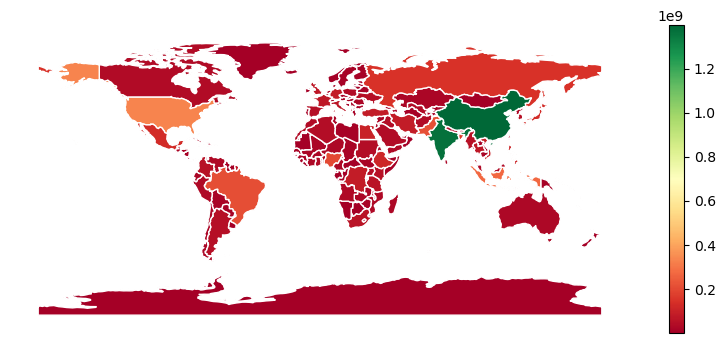

In [2]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))


# Plot the GeoDataFrame with continuous value 
# coloring by population estimate
gdf.plot(
    column='pop_est',  # Column to determine colors
    ax=ax,
    cmap='RdYlGn',  # Colormap
    linewidth=1,  # Width of the edges
    edgecolor='w',  # Color of the edges
    legend=True  # Display legend
)


# Remove axis for a cleaner look
ax.axis('off')


# Display the plot
plt.show()


### Choropleth Maps

This example created a choropleth map, which is a type of map where areas are shaded or patterned in proportion to the value of a variable being represented. By using continuous value coloring, we can effectively visualize how different countries' population estimates compare across the globe, providing an insightful representation of the data.

As a closing note, one key observation from this map is that China and India are by far the greenest countries, with Brazil and the United States following in orange. Meanwhile, the vast majority of the map is colored red. This observation can be attributed to the distribution of country-level population values, which follows a heavily skewed power-law distribution. In the next topic, we will learn how to address this and improve our map visualization accordingly.

### 3. Using Matplotlib for Continuous Value Coloring with Logarithmic Scale

Visualizing geospatial data with continuous values can be further enhanced by applying different scaling techniques to better represent the data's distribution. One effective approach is to use a **logarithmic scale**, which can provide more detail for data with a wide range of values. In this section, we will explore how to visualize geospatial data with continuous values using a logarithmic scale with the help of Matplotlib.

We will again rely on the built-in world map dataset of GeoPandas, and we will use Matplotlib to visualize a world map where each country is colored according to its population estimate stored in the continuous data column `pop_est`. This time, we will apply a logarithmic scale to the population data to better handle the wide range of values.

To carry out this scaling:
- create a normalization object using `LogNorm` from Matplotlib, which scales the data logarithmically
- set the `vmin` and `vmax` parameters to the minimum and maximum values of the population estimates to define the range of the scale we introduced in the previous paragraph
- create a figure and axis using the same `plt.subplots` with a figure size of (10, 4) inches.

Finally, we use the `plot` function with several parameters: 
- `column` specifies the data column to visualize (`pop_est`),
- `cmap` defines the colormap (`RdYlGn`), and
- `norm` applies the logarithmic scale.
- `linewidth` and `edgecolor` parameters control the appearance of the country borders
- `legend` parameter is set to `True` to display a legend.


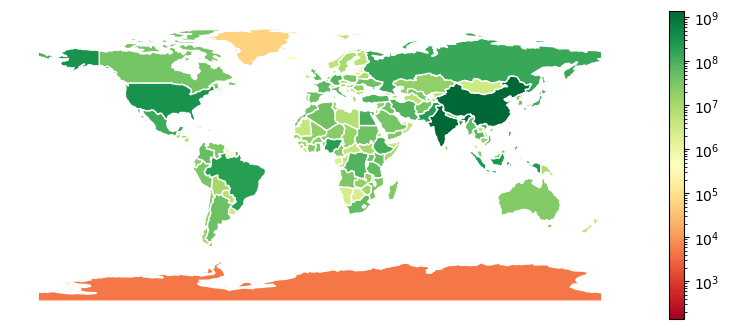

In [3]:
# Library imports
from matplotlib.colors import LogNorm

# Create a logarithmic normalization object
norm = LogNorm(vmin=gdf['pop_est'].min(), vmax=gdf['pop_est'].max())

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot the GeoDataFrame with continuous value coloring 
# by population estimate using logarithmic scale
gdf.plot(
    column='pop_est',  # Column to determine colors
    ax=ax,
    cmap='RdYlGn',  # Colormap
    linewidth=1,  # Width of the edges
    edgecolor='w',  # Color of the edges
    legend=True,  # Display legend
    norm=norm  # Apply logarithmic normalization
)


# Remove axis for a cleaner look
ax.axis('off')

# Display the plot
plt.show()

Using a logarithmic scale helps to reveal patterns and details in the data that might be obscured by a linear scale, especially when dealing with data that spans several orders of magnitude, such as population levels of different geographies ranging from China to the Antarctic. This approach of scaling allows for a more nuanced and insightful representation of geospatial data, highlighting differences that are not immediately apparent with a linear scale.

### 4.  Visualizing Multiple GeoDataFrames

Visualizing multiple GeoDataFrames on the same plot allows for the comparison of different datasets and the overlaying of additional information on a single map. This technique is particularly useful when we want to highlight specific features or compare various geographic datasets. 

In the following example, we will use two GeoDataFrames: one representing a world map (`gdf`), and another containing random geographic points (`gdf_rand`) we learned to generate in the previous chapter using `Numpy`. We will visualize the world map in a grey color and overlay the random points in crimson. This allows us to see the points in the context of the world map, enhancing our understanding of their geographic distribution.

Steps:
 1. Create a figure and axis using `plt.subplots` with a figure size of (10, 4) inches.
 2. Plot the world map GeoDataFrame (`gdf`) with the `plot` function, setting the `column` parameter to `continent` for categorization, `color` to grey for a neutral background, `alpha` for transparency, and `edgecolor` and `linewidth` for boundary styling.
 3. Add the GeoDataFrame containing the random points  (`gdf_rand`) by using the `plot` function, specifying the `markersize` and `color` parameters to highlight the points in crimson.

In [4]:
# Import all necessary libraries
import numpy as np
from shapely.geometry import Point

# Calculate the minimum and maximum bounds of the GeoDataFrame
bounds = gdf.total_bounds
minx, miny, maxx, maxy = bounds

# Initialize an empty list to store random points
random_points = []

# Generate 1000 random points within the bounds
for _ in range(1000):
    x = np.random.uniform(minx, maxx)
    y = np.random.uniform(miny, maxy)
    random_points.append(Point(x, y))

# Create a GeoDataFrame from the list of random points
gdf_rand = gpd.GeoDataFrame(random_points, columns=['geometry'])

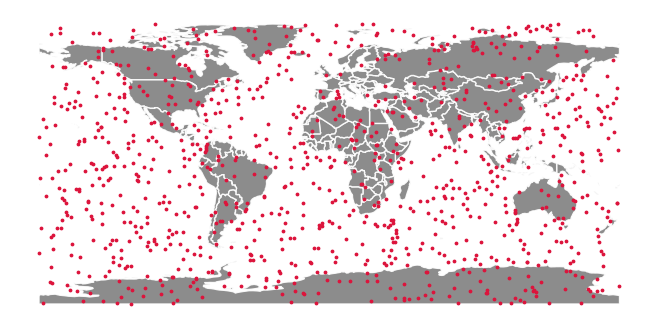

In [5]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot the world map GeoDataFrame with grey color
gdf.plot(
    ax=ax,
    #column='continent',  # Column to determine colors
    color='grey',  # Base color
    alpha=0.9,  # Transparency level
    edgecolor='w',  # Color of the edges
    linewidth=1  # Width of the edges
)

# Overlay the random points GeoDataFrame with crimson color
gdf_rand.plot(
    ax=ax,
    markersize=3,  # Size of the points
    color='crimson'  # Color of the points
)

# Remove axis for a cleaner look
ax.axis('off')

# Display the plot
plt.show()

By visualizing multiple GeoDataFrames on a single map, we can effectively combine and compare different datasets, enhancing the interpretability and richness of our geospatial visualizations. This technique is especially useful for overlaying additional data, such as points of interest, on a base map, providing a more comprehensive view of our geographic data.

### 5. Creating a Heatmap from Point Data

**Heatmaps** are an effective way to visualize measures such as the aggregates and density of point data on a map. They provide a clear representation of areas with high concentrations of points, which can be particularly useful for identifying hotspots and other spatial patterns within the data. In this section, we will explore how to create a heatmap from point data using the previously introduced Matplotlib and GeoPandas tools.

We will generate the usual set of random points within the bounds of a GeoDataFrame (`gdf`) and create a heatmap to visualize the density of these points. 

Steps:

1. Import the global map and then generate random points using `Numpy`.
2. Perform a spatial join between the random point GeoDataFrame to attach each point to its enclosing country (using within-tests in the background), and then we count the number of points within each country using the `groupby` function  (`gdf_counted`).
3. Plot the random points in crimson and visualize the heatmap using the `count` column to represent the density of points. We use the `Reds` colormap to create a gradient effect, highlighting areas with a higher number of points.

In [6]:
# Define the bounds of the GeoDataFrame
mins = gdf.bounds.min().to_dict()
maxs = gdf.bounds.max().to_dict()

# Generate random points within the bounds
random_points = []
for _ in range(1000):
    x = np.random.uniform(mins['minx'], maxs['maxx'])
    y = np.random.uniform(mins['miny'], maxs['maxy'])
    random_points.append(Point(x, y))

# Create a GeoDataFrame for the random points
gdf_rand = gpd.GeoDataFrame(random_points, columns=['geometry'])
gdf_rand.head(3)

,geometry
0,POINT (-87.31064 -8.87025)
1,POINT (-79.48549 83.3317)
2,POINT (-39.57381 72.4537)


In [7]:
# Perform a spatial join to count the number 
# of points within each geographic region
gdf_joined = gpd.sjoin(gdf_rand, gdf)
gdf_counted = gdf_joined.groupby(by='name').count()[['geometry']]

# Rename the 'geometry' column to 'count' and 
# merge with the base GeoDataFrame
gdf_counted = gdf_counted.rename(\
                    columns={'geometry': 'count'}).merge(\
                    gdf[['name', 'geometry']], 
                    left_index=True, right_on='name')

gdf_counted = gpd.GeoDataFrame(gdf_counted)

# Display the first 3 entries of the counted GeoDataFrame
gdf_counted.head(3)

/var/folders/kx/_1g1vzv51nq1yv81c377flsr0000gn/T/ipykernel_64175/1143072340.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_joined = gpd.sjoin(gdf_rand, gdf)


,count,name,geometry
125,1,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58, 2..."
82,3,Algeria,"POLYGON ((-8.6844 27.39574, -8.66512 27.58948,..."
159,115,Antarctica,"MULTIPOLYGON (((-48.66062 -78.04702, -48.1514 ..."


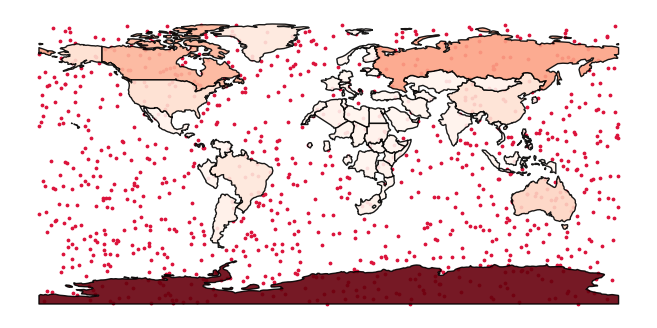

In [8]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot the random points in crimson
gdf_rand.plot(ax=ax, markersize=3, color='crimson')

# Plot the heatmap using the 'count' column to represent density
gdf_counted.plot(ax=ax, 
                 column='count', 
                 alpha=0.9, 
                 cmap='Reds', 
                 edgecolor='k', 
                 linewidth=1)

# Remove axis for a cleaner look
ax.axis('off')

# Display the plot
plt.show()

By combining random points with a world map we created a heatmap that effectively visualizes the number of data points within each country. As the points were scattered across the map randomly, we may note that the larger a country, the darker its color, serving as a quantitative indicator of area.

### 6. Adding Basemap with Contextily

Enhancing geospatial visualizations with base maps can provide valuable geographic context and make our data more informative and visually appealing. [Contextily](https://contextily.readthedocs.io/en/latest/) is a Python library that allows us to add base maps from various providers to our GeoPandas plots. 

In the following example, we will use the usual GeoDataFrame (`gdf`) representing the world map and plot it on a basemap provided by Esri's [WorldTopoMap](https://www.arcgis.com/home/item.html?id=30e5fe3149c34df1ba922e6f5bbf808f). When visualizing the map, we will adjust and customize the plotting parameters introduced earlier in this chapter, and project both the data set and the base-map to the Web Mercator projection. Additionally, to improve visibility, we discard Antarctica.  This combined map will give us a detailed geographic background to better understand the context of the plotted data.

**NOTE** 

This cell should be run after Section 7 (`folium`), due to a conflict that messes up the display of tooltips and popups in `folium`

In [ ]:
# Import all necessary libraries
import contextily as ctx

# Load the sample dataset of world countries
gdf = gdf[gdf.continent != 'Antarctica']
crs = 'EPSG:3857'
gdf = gdf.to_crs(crs)

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the GeoDataFrame with transparent fill and white edges
gdf.plot(
    ax=ax,
    #column='continent',  # Column to determine colors
    alpha=0.9,  # Transparency level
    color='None',  # Transparent fill
    edgecolor='r',  # Color of the edges
    linewidth=1  # Width of the edges
)

# Add basemap using Contextily
ctx.add_basemap(
    ax,
    crs=crs,  # Coordinate reference system of the GeoDataFrame
    source=ctx.providers.Esri.WorldTopoMap  # URL of the basemap provider
)


# Remove axis for a cleaner look
ax.axis('off')

Now, we also take a look at how to explore further base map providers and list their currently available base map types:

In [ ]:
# Print the list of base map providers
providers = ctx.providers
print("Base map providers: ", dir(providers), "\n")

# Print the available base maps from Esri
esri_maps = providers.Esri
print("\nBase maps by Esri: ", dir(esri_maps), "\n")

As we learned in this section, adding a base map, for instance, with Contextily, significantly enhances the visual context of our geospatial data via the detailed visual geographic background.

### 7. Creating a Simple Interactive Map with Folium


**Interactive maps** can provide a more engaging and informative way to visualize geospatial data by allowing us to explore the data sets in real-time. [Folium](https://python-visualization.github.io/folium/) is a powerful Python library that makes it easy to create such interactive maps by leveraging the Leaflet.js library. 

In the following example, we will use the usual GeoDataFrame (`gdf`) representing the world map and first convert it to GeoJSON format to ensure data compatibility with Folium using the `to_json` method. Then, we create a base map centered at the coordinates `[0, 0]` with an initial zoom level of 2 using the `folium.Map` function. We add the GeoJSON data to the map using the `folium.GeoJson` function. We also add tooltips to display the country names by specifying the `fields` and `aliases` parameters in `folium.GeoJsonTooltip`.

Finally, we add a layer control to the map to allow users to toggle different layers on and off using the `folium.LayerControl` function, save the interactive map as an interactive HTML file, and display it as the code cell's output.

**NOTE**

There is a conflct between `contextily` and `folium`. When `contextily` is loaded before `folium`, the tooltips and popups do not appear...

In [24]:
# Import all necessary libraries
import folium

# Convert GeoDataFrame to GeoJSON
geojson_data = gdf.to_json()

# Set the desired width and height in pixels
width = 800
height = 600

# Create a base map centered at coordinates [0, 0] 
# with zoom level 2 and predefined size
m = folium.Map(location=[0, 0], zoom_start=2, width=width, height=height)

tooltip = folium.GeoJsonTooltip(
    fields=['name', "pop_est"],
    aliases=['Country:', "Population:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=200,
)

popup = folium.GeoJsonPopup(
    fields=['name'],
    aliases=['Country'],
    localize=True,
    labels=True,
    style='background-color: yellow;',
)

# Add GeoJSON data to the map with tooltips for country names
folium.GeoJson(
    geojson_data,
    name='Countries',
    #tooltip=tooltip,
    popup=popup,
    tooltip=tooltip, #folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'])
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('countries_map.html')

# Display the map in the notebook
m

Try zooming in on a region that you are familiar with and note the level of detail that is available.

By using Folium, we can create interactive maps that allow users to explore geospatial data in a dynamic way. The addition of tooltips and layer controls enhances the user experience, making it easier to gain insights and understand the spatial relationships within the data. 

### 8. Creating a Simple Interactive Map with Plotly

[Plotly](https://plotly.com/python/) is a versatile Python library for creating interactive visualizations, including maps. By using Plotly, we can make interactive maps that allow for rich interactivity and detailed data exploration. 

In the following example, we will use another built-in dataset of GeoPandas about global cities (`gdf_cities`) containing city locations worldwide. After a few preparatory steps, we convert the geometries to a pair of two-dimensional arrays and store them in the columns we call `lon` and `lat.`

Then, we use the `px.scatter_mapbox` function from Plotly Express to create the interactive map. We specify the latitude and longitude columns we just created and include various formatting commands such as hover information, map style, zoom level, and center of the map. As a final touch, we update the layout to remove margins for a cleaner look and display the interactive map.

In [23]:
# Import all necessary libraries
import plotly.express as px
 # fix for blank plots:
import plotly.io as pio 
pio.renderers.default = 'iframe'


# Load the sample dataset of cities (replace with your actual data)
#  Define location of the data file
file_name = 'naturalearth_cities/naturalearth_cities.shp'
# Read the saved dataset (naturalearth_lowres) into a GeoDataFrame
gdf_cities = gpd.read_file(file_name)

# Ensure the GeoDataFrame has a unique identifier column
gdf_cities['id'] = gdf_cities.index.astype(str)

# Step 1: Convert the geometries to a format Plotly can understand
gdf_cities['lon'] = gdf_cities.geometry.x
gdf_cities['lat'] = gdf_cities.geometry.y

# Step 2: Create a Plotly map
fig = px.scatter_geo(
    gdf_cities,
    lat="lat",
    lon="lon",
    hover_name="name",
    center={"lat": 0, "lon": 0},
)

# Set the desired width and height in pixels
width = 800
height = 600

# Remove margins for a cleaner look and set the figure size
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    width=width,
    height=height
)

# Step 3: Show the figure
fig.update_layout(map_style="carto-positron")
fig.show()


By using Plotly, we can create highly interactive and visually appealing maps that are easy to integrate into web applications and interactive reports. The ability to add hover information and customize the map style enhances the user experience, making it easier to explore and understand the spatial aspects of our data.

### Summary on Geospatial Data Visualization

In this notebook, we explored the diverse possibilities of visualizing geospatial data in Python, starting with the foundational tools to advanced interactive mapping libraries. 
- We began by using Matplotlib for basic geospatial plots, including categorical and continuous value coloring.
- By leveraging Matplotlib's capabilities, we demonstrated how to create clear and insightful maps, using both linear and logarithmic scales.
- We can also explore the creation of 3D geometries: how Matplotlib's 3D plotting capabilities can add depth and dimension to geospatial data, providing a richer context for analysis.


Advancing to more interactive and visually engaging tools, we introduced Folium, Plotly, and Pydeck. 
- Folium and Plotly enabled us to create simple, interactive maps with ease, allowing users to explore geospatial data dynamically through a web-based interface.
- With Pydeck, we can take geospatial visualization to the next level, rendering high-performance 3D maps that support complex geometries and real-time interaction.

Through these examples, we illustrated the versatility and power of Python's geospatial visualization libraries, providing the skills to visualize and analyze spatial data across a wide range of applications, from urban planning to environmental monitoring.

## Exercises

1. Repeat all cells of the above notebook for a single continent, Asia for exampole.